### Importing required libraries

In [602]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler as sc
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve,precision_score,recall_score,f1_score,plot_confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

### Importing dataset

In [603]:
df=pd.read_csv("USA_Uni_Subject .csv")
df

,GRD_PTS_PER_UNIT,At_Risk,CATALOG_NBR,GPAO,ANON_INSTR_ID,TERM,HSGPA,LAST_ACT_ENGL_SCORE,LAST_ACT_MATH_SCORE,LAST_ACT_READ_SCORE,LAST_ACT_SCIRE_SCORE,LAST_ACT_COMP_SCORE,SEX
0,2.0,F,271,2.945000,3057,102,NaN,NaN,NaN,NaN,NaN,NaN,F
1,1.7,F,271,3.118750,1996,102,3.9,29.0,26.0,34.0,32.0,31.0,F
2,0.0,T,271,2.500000,4230,102,0.0,25.0,30.0,NaN,NaN,30.0,F
3,2.0,F,271,3.738462,56,102,3.7,25.0,34.0,NaN,NaN,32.0,F
4,2.4,F,271,3.326531,283,102,3.6,NaN,NaN,NaN,NaN,NaN,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1857,3.3,F,271,3.760000,2458,122,4.0,33.0,34.0,32.0,26.0,31.0,M
1858,4.0,F,271,4.209091,779,122,3.8,NaN,NaN,NaN,NaN,NaN,F
1859,3.0,F,271,3.231707,2458,122,0.0,NaN,NaN,NaN,NaN,NaN,F
1860,2.7,F,271,3.384615,2886,122,3.8,33.0,25.0,27.0,26.0,28.0,F


# **i. If not, state the reason and write a Python script to perform any necessary preprocessing so that the data becomes suitable to be used.**

### Lets Replace dummy values "?" and numerical values in SEX column

In [604]:
df.loc[(df["SEX"]!="M") & (df["SEX"]!="F"),"SEX"]=np.nan

In [605]:
#Check Null value percentage

#foor loop for iterating through column name and null percent values
for cname,nperc in zip(((df.isna().sum()/df.shape[0])*100).index,(df.isna().sum()/df.shape[0])*100):
  #skip columns with no null values
  if nperc>0:
    print("Colum",cname,"Has",nperc,"Percent Null values")

Colum HSGPA Has 24.06015037593985 Percent Null values
Colum LAST_ACT_ENGL_SCORE Has 53.75939849624061 Percent Null values
Colum LAST_ACT_MATH_SCORE Has 53.92051557465092 Percent Null values
Colum LAST_ACT_READ_SCORE Has 59.66702470461869 Percent Null values
Colum LAST_ACT_SCIRE_SCORE Has 59.828141783029 Percent Null values
Colum LAST_ACT_COMP_SCORE Has 53.75939849624061 Percent Null values
Colum SEX Has 16.487647690655212 Percent Null values


1.   We observe that HSGPA and Sex columns have less than 30% missing values,so we will try to impute them with appropriate method but we will have to drop null values in SEX column because it makes no meaning to impure Gender based on assumption.
2.   While Other columns having more than 30% missing values will be deleted as there is no point in imputing them and imputing them can cause a bias in our dataset for ML modelling.


In [606]:
#Dropping columns with more than 30% missing values and Null values in sex because imputing sex based on assumption doesnt sound correct.
#It may happen that there might be some person at risk of failure and is a M and we impute it as F,will be wrong.

#dropping nulls above 30% and CATALOG_NBR because we observe that the columns consists of one value 271,so for all the records it doesnt change so we drop that as it might create a bias in dataset
df.drop(["CATALOG_NBR","LAST_ACT_ENGL_SCORE","LAST_ACT_MATH_SCORE","LAST_ACT_READ_SCORE","LAST_ACT_SCIRE_SCORE","LAST_ACT_COMP_SCORE"],axis=1,inplace=True)

#dropping sex with null values
df.drop(df[df["SEX"].isna()].index.to_list(),axis=0,inplace=True)


### Lets check the mean and median differnece to see if to use mean or median

In [607]:
diff_F=df.loc[(df["At_Risk"]=="F") & (df["HSGPA"].isna()==False),"HSGPA"].mean()-df.loc[(df["At_Risk"]=="F") & (df["HSGPA"].isna()==False),"HSGPA"].median()
diff_T=df.loc[(df["At_Risk"]=="T") & (df["HSGPA"].isna()==False),"HSGPA"].mean()-df.loc[(df["At_Risk"]=="T") & (df["HSGPA"].isna()==False),"HSGPA"].median()
print(abs(diff_F),abs(diff_T))

0.5333682514101414 0.6332947976878627


### From above result we observe that the mean and median difference is very less so we can use mean or median for imputing the values.

In [608]:
#imputing HSGPA based on At_Risk cols using median
median_F=df.loc[(df["At_Risk"]=="F"),"HSGPA"].median()
median_T=df.loc[(df["At_Risk"]=="T"),"HSGPA"].median()
df.loc[(df["At_Risk"]=="F") & (df["HSGPA"].isna()),"HSGPA"]=median_F
df.loc[(df["At_Risk"]=="T") & (df["HSGPA"].isna()),"HSGPA"]=median_T

### Checking null values

In [609]:
#Checking null values

#We observe that all the necesaary null values have now been imputed
print(df.isna().sum())

GRD_PTS_PER_UNIT    0
At_Risk             0
GPAO                0
ANON_INSTR_ID       0
TERM                0
HSGPA               0
SEX                 0
dtype: int64


# iii. Submit the pre-processed data in CSV format 

In [610]:
df.to_csv("C:\\Users\\Angat\\Downloads\\preprocessed_df.csv",index=False)

# **2. Create a NN Classifier**

In [611]:
from itertools import combinations
def attributeCombinations(sample_list):
    #Declares a list for storing column combinations to be tested
    newList=[]
    k=[list(combinations(sample_list,i)) for i in range(1,len(sample_list)+1)]
    for j in k:
        for m in j:
            newList.append(list(m))
    return newList

In [612]:
#Before splitting lets transform Sex and At_risk into binary format
df["At_Risk"]=df["At_Risk"].apply(lambda x:1 if x=="T" else 0)
df["SEX"]=df["SEX"].apply(lambda x:1 if x=="M" else 0)

In [613]:
df.to_csv("C:\\Users\\Angat\\Downloads\\preprocessed_df.csv",index=False)

In [614]:
#We drop ANON_INSTR_ID because having any instructor to mark wont make a difference unless we are assuming a particular instructor is strict to eliminate.
#Similarly assuming for Term it doesnt matter which term the student is from,he can be at risk in any term i.e lower or higher.
X=df.drop(["At_Risk"],axis=1)
Y=df["At_Risk"]

In [615]:
#After Scaling the dataset,we now look for columns that best fit the data.
mods=pd.DataFrame({})
for i in attributeCombinations(X.columns.to_list()):
    X_train,X_test,Y_train,Y_test=tts(X[i],Y,test_size=0.25,random_state=1)
    model.fit(X_train,Y_train)
    mods=mods.append({"Cols":i,"Training":accuracy_score(model.predict(X_train),Y_train),"Testing":accuracy_score(model.predict(X_test),Y_test),"Length":len(i)},ignore_index=True)
mods["Cols"]=mods["Cols"].apply(lambda x:",".join(x))
mods.sort_values(["Training","Testing"],ascending=False)
#from aboove we see that GRD_PTS_PER_UNIT,GPAO fit best so we use these two columns
X.drop(['ANON_INSTR_ID', 'TERM'],axis=1,inplace=True)

C:\Users\Angat\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Angat\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Angat\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Angat\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Angat\anaconda3\lib\site-packages\sklearn\neural_network\_multi

In [616]:
X_train,X_test,Y_train,Y_test=tts(X,Y,test_size=0.25,random_state=1)

In [617]:
model=MLPClassifier(random_state=2)
model.fit(X_train,Y_train)
print("Training Accuracy Before Scaling :",accuracy_score(model.predict(X_train),Y_train))

Training Accuracy Before Scaling : 1.0


In [618]:
print("Testing Accuracy Before Scaling :",accuracy_score(model.predict(X_test),Y_test))

Testing Accuracy Before Scaling : 1.0


### From above we observe that,the model is performing good on training and testing dataset and there isnt much difference in training and testing accuracy score that points overfitting.

### Now lets train the same model when we standard scale the traing parameters

In [619]:
#We remove SEX columns because that a binary columns and we dont want to include it in standard scaling
X=X.drop(["SEX"],axis=1)
std=sc().fit(X)
X_transformed=pd.DataFrame(std.transform(X),columns=X.columns)
#Now that we have scaled the variables,we can include SEX colum
X_transformed["SEX"]=df["SEX"].to_list()

In [620]:
# #After Scaling the dataset,we now look for columns that best fit the data.
# mods=pd.DataFrame({})
# for i in attributeCombinations(X_transformed.columns.to_list()):
#     X_train,X_test,Y_train,Y_test=tts(X_transformed[i],Y,test_size=0.25,random_state=1)
#     model.fit(X_train,Y_train)
#     mods=mods.append({"Cols":i,"Training":accuracy_score(model.predict(X_train),Y_train),"Testing":accuracy_score(model.predict(X_test),Y_test),"Length":len(i)},ignore_index=True)
# mods["Cols"]=mods["Cols"].apply(lambda x:",".join(x))
# mods.sort_values(["Training","Testing"],ascending=False)
# #from aboove we see that GRD_PTS_PER_UNIT,GPAO fit best so we use these two columns
# X_transformed.drop(['ANON_INSTR_ID', 'TERM', 'HSGPA', 'SEX'],axis=1,inplace=True)

In [621]:
X_transformed

,GRD_PTS_PER_UNIT,GPAO,HSGPA,SEX
0,-0.520086,-0.932839,0.381831,0
1,-0.776664,-0.563052,0.537281,0
2,-2.230606,-1.879919,-2.493986,0
3,-0.520086,0.755861,0.381831,0
4,-0.177982,-0.120839,0.304106,1
...,...,...,...,...
1550,0.591752,0.801700,0.615006,1
1551,1.190434,1.757487,0.459556,0
1552,0.335174,-0.322649,-2.493986,0
1553,0.078596,0.002781,0.459556,0


In [622]:
X_train,X_test,Y_train,Y_test=tts(X_transformed,Y,test_size=0.25,random_state=1)
model.fit(X_train,Y_train)
print("Training Accuracy :",accuracy_score(model.predict(X_train),Y_train))

Training Accuracy : 0.9991423670668954


In [623]:
print("Training Accuracy :",accuracy_score(model.predict(X_test),Y_test))

Training Accuracy : 0.9974293059125964


### From above we observe that,the model is performing better after standard scaling on training.And Training and testing accuracies on dataset dont have much difference in accuracy score that points overfitting.

### Using paramter tuning lets find the best paramters to train our model

In [624]:
# Defining the set of parameters for MLP classifiers to pick
parameter_space = {
    'hidden_layer_sizes': [(100,),(150,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001,0.01],
    'learning_rate': ['constant','adaptive'],
}

### Decalring a Grid Search method to iterate over the parameters and apply to classifer

In [625]:
clf = GridSearchCV(model, parameter_space, n_jobs=-1, cv=10)
clf.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=MLPClassifier(random_state=2), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [(100,), (150,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

### Lets now see the performances of each fols with paramter values considered for training

In [626]:
print(clf.best_params_)

{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam'}


In [627]:
#We tabulate all the paramter folds and possible values taken and their scores
cv_results = pd.DataFrame(clf.cv_results_)
#We drop the params column because we already have individual param values in the dataframe
cv_results.drop(["params"],axis=1,inplace=True)
#We now sort the dataframe by avg test score
cv_results.sort_values(["mean_test_score"],ascending=False).loc[:,"param_activation":"mean_test_score"]

,param_activation,param_alpha,param_hidden_layer_sizes,param_learning_rate,param_solver,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score
23,tanh,0.01,"(150,)",adaptive,adam,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.0,1.0,1.0,1.000000,1.000000
15,tanh,0.001,"(150,)",adaptive,adam,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.0,1.0,1.0,1.000000,1.000000
21,tanh,0.01,"(150,)",constant,adam,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.0,1.0,1.0,1.000000,1.000000
3,tanh,0.0001,"(100,)",adaptive,adam,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.0,1.0,1.0,1.000000,1.000000
19,tanh,0.01,"(100,)",adaptive,adam,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.0,1.0,1.0,1.000000,1.000000
5,tanh,0.0001,"(150,)",constant,adam,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.0,1.0,1.0,1.000000,1.000000
7,tanh,0.0001,"(150,)",adaptive,adam,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.0,1.0,1.0,1.000000,1.000000
17,tanh,0.01,"(100,)",constant,adam,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.0,1.0,1.0,1.000000,1.000000
9,tanh,0.001,"(100,)",constant,adam,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.0,1.0,1.0,1.000000,1.000000
11,tanh,0.001,"(100,)",adaptive,adam,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.0,1.0,1.0,1.000000,1.000000


In [628]:
#Using the best params and estimator we can get our best classification model and set of parameters that suit well for predictions
print("Best Classification Model :",clf.best_estimator_) 
print("\nBest Classification Model parameters:") 
for k in clf.best_params_:
    print(f"{k}={clf.best_params_[k]}")
grid_predictions = clf.predict(X_test) 

Best Classification Model : MLPClassifier(activation='tanh', random_state=2)

Best Classification Model parameters:
activation=tanh
alpha=0.0001
hidden_layer_sizes=(100,)
learning_rate=constant
solver=adam


### We observe that these paramters have imporoved the perfromance in more better way compared to classifier without tuning.

### Lets now check the performance of tuned model paramters and check whether ofr not this overfits or underfits.

In [629]:
param_values=clf.best_params_
bestClassificationTunedModel=MLPClassifier(activation=param_values["activation"],
                         alpha=param_values["alpha"],
                         hidden_layer_sizes=param_values["hidden_layer_sizes"],
                         learning_rate=param_values["learning_rate"],
                         solver=param_values["solver"],
                         random_state=2)
bestClassificationTunedModel.fit(X_train,Y_train)
print("Training Accuracy :",accuracy_score(bestClassificationTunedModel.predict(X_train),Y_train))
print("Testing Accuracy :",accuracy_score(bestClassificationTunedModel.predict(X_test),Y_test))

Training Accuracy : 1.0
Testing Accuracy : 1.0


### We observe that the training and testing accuracies have no difference hence we can state that model is not overfitting.

###  Lets evaluate the Cost of classification Model

In [630]:
#Cost Calculation for model
cm=confusion_matrix(bestClassificationTunedModel.predict(X_test),Y_test)
cost_matrix = np.array([[0,1], [100,-1]])
ModelCost=np.multiply(cm, cost_matrix).sum()
print("Cost For Model:",ModelCost)
#Calculating cost for wrong classified points
print("Model Cost for misclassified points :",ModelCost*(cm[0,1]+cm[1,0]))

Cost For Model: -49
Model Cost for misclassified points : 0


### So the model cost for misclassified points is below 0 because there are no misclassifications observed so we cannot simply rely on cost of model performance and we will have to evaluate model performance using other evaluation metrics.

### Lets now evaluate Metrics like accuracy,Sensitivity,Specificity,ROC and loss per curve

In [631]:
modelPredictions=bestClassificationTunedModel.predict(X_test)

#Print accuracy,Sensitivity,Specificity,ROC
print("Accuracy Score :",accuracy_score(modelPredictions,Y_test))
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity Score : ', sensitivity )
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity Score : ', specificity)
print("ROC_AUC Score :",roc_auc_score(modelPredictions,Y_test))
print("Precision Score :",precision_score(modelPredictions,Y_test))
print("Recall Score :",recall_score(modelPredictions,Y_test))
print("F1 Score :",f1_score(modelPredictions,Y_test))

Accuracy Score : 1.0
Sensitivity Score :  1.0
Specificity Score :  1.0
ROC_AUC Score : 1.0
Precision Score : 1.0
Recall Score : 1.0
F1 Score : 1.0


In [632]:
# print classification report 
print(classification_report(Y_test, modelPredictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       340
           1       1.00      1.00      1.00        49

    accuracy                           1.00       389
   macro avg       1.00      1.00      1.00       389
weighted avg       1.00      1.00      1.00       389



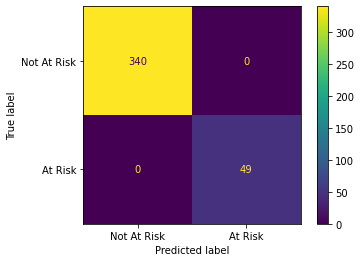

In [633]:
#plot Confusion Matrix
ConfusionMatrixDisplay(cm, display_labels=['Not At Risk', 'At Risk']).plot()
plt.show()

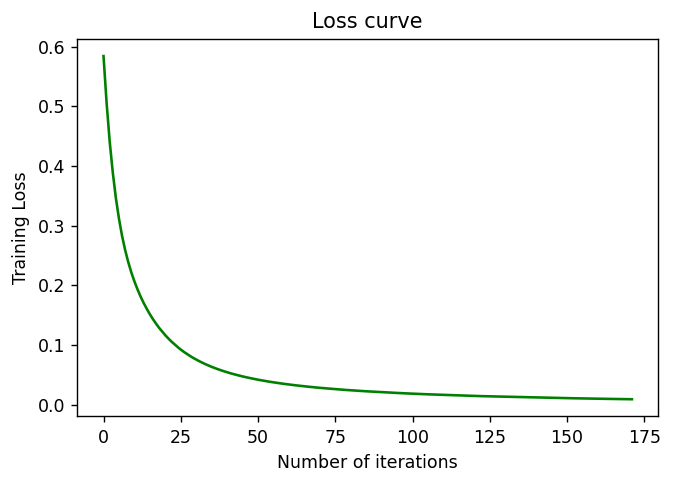

In [634]:
#plot model loss curve
lossPerIteration = bestClassificationTunedModel.loss_curve_ #model loss curve
plt.figure(dpi=125)
plt.plot(lossPerIteration,color="green")
plt.title("Loss curve")
plt.xlabel("Number of iterations")
plt.ylabel("Training Loss")
plt.show()

### From the metrics and loss per curve, we observe that our model is performing good and identifying all the Actual risks correctly and also able to predict cases where student is not at risk accurately.

In [641]:
#2.0,2.945,0,1
a,b,c,d=1.0,1,0.7,0
std.transform(pd.DataFrame([[a,b,c]]))
new_array = np.append(std.transform(pd.DataFrame([[a,b,c]])),d).reshape(1,-1)
new_array
bestClassificationTunedModel.predict(new_array)

C:\Users\Angat\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Angat\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Angat\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [642]:
import pickle
pickle.dump(model, open("C:\\Users\\Angat\\Downloads\\model.pkl", 'wb'))

In [644]:
X["GRD_PTS_PER_UNIT"].max()

4.4